In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
from sklearn.model_selection import GroupKFold

In [2]:
merged = pd.DataFrame(pd.read_pickle('../raw_merged_data_v2_withinyears'))
merged

,date,Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year),setting,"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4 (% of population ages 0-4)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)",Women participating in own health care decisions (% of women age 15-49),Antiretroviral therapy coverage (% of adult males living with HIV),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)",...,Land area where elevation is below 5 meters (% of total land area) urban,Population living in areas where elevation is below 5 meters (% of total population) rural,Population living in areas where elevation is below 5 meters (% of total population) urban,Coverage of social safety net programs (% of population) Quintile 1 (poorest),Coverage of social safety net programs (% of population) Quintile 5 (richest),Coverage of social insurance programs (% of population) Quintile 1 (poorest),Coverage of social insurance programs (% of population) Quintile 5 (richest),Coverage of unemployment benefits and ALMP (% of population) Quintile 1 (poorest),Coverage of unemployment benefits and ALMP (% of population) Quintile 5 (richest),income_num
0,2019.0,94.52,Algeria,16.054,45.0,71.605,3.918,NaN,61.0,3.911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,2015.0,NaN,Algeria,18.055,NaN,70.700,4.082,NaN,43.0,4.081,...,0.007108,0.120913,1.124755,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,2010.0,NaN,Algeria,17.537,NaN,72.403,4.115,NaN,21.0,4.153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
3,2000.0,NaN,Algeria,20.944,NaN,77.248,4.371,NaN,7.0,4.454,...,0.006448,0.165027,1.217309,NaN,NaN,NaN,NaN,NaN,NaN,3.0
4,2020.0,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,62.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9545,2000.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9546,2005.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9547,2010.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9548,2015.0,NaN,NIU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
missing_dropped = merged.dropna(axis=1, how='all', ignore_index=True)
missing_dropped.shape

(9550, 733)

In [4]:
rdrop = missing_dropped.dropna(axis=0, how='all', ignore_index=True)
rdrop.shape

(9550, 733)

In [5]:
ydrop = missing_dropped.dropna(subset=['Maternal mortality ratio (national estimate, per 100,000 live births)'])
ydrop

,date,Women and girls who use menstrual materials (% of women and girls ages 15-49 who had a menstrual period within the last year),setting,"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)","Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4 (% of population ages 0-4)","Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)",Women participating in own health care decisions (% of women age 15-49),Antiretroviral therapy coverage (% of adult males living with HIV),"Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)",...,Land area where elevation is below 5 meters (% of total land area) urban,Population living in areas where elevation is below 5 meters (% of total population) rural,Population living in areas where elevation is below 5 meters (% of total population) urban,Coverage of social safety net programs (% of population) Quintile 1 (poorest),Coverage of social safety net programs (% of population) Quintile 5 (richest),Coverage of social insurance programs (% of population) Quintile 1 (poorest),Coverage of social insurance programs (% of population) Quintile 5 (richest),Coverage of unemployment benefits and ALMP (% of population) Quintile 1 (poorest),Coverage of unemployment benefits and ALMP (% of population) Quintile 5 (richest),income_num
3,2000.0,NaN,Algeria,20.944,NaN,77.248,4.371,NaN,7.0,4.454,...,0.006448,0.165027,1.217309,NaN,NaN,NaN,NaN,NaN,NaN,3.0
42,2011.0,NaN,Bangladesh,NaN,NaN,NaN,NaN,63.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
46,2017.0,NaN,Bangladesh,NaN,NaN,NaN,NaN,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
56,2001.0,NaN,Bangladesh,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
75,2010.0,NaN,Burkina Faso,61.242,NaN,92.583,25.737,23.7,32.0,25.313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8851,1989.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8852,1988.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8853,1987.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
8854,1986.0,NaN,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


In [6]:
dropped = ydrop.drop(['Maternal mortality ratio (modeled estimate, per 100,000 live births)', 'Lifetime risk of maternal death (1 in: rate varies by country)', 'Lifetime risk of maternal death (%)', 'Number of maternal deaths'], axis=1)

In [8]:
rdrop['date'].unique()

array([2019., 2015., 2010., 2000., 2020., 2018., 2017., 2016., 2014.,
       2013., 2012., 2011., 2009., 2008., 2007., 2006., 2005., 2004.,
       2003., 2002., 2001., 1999., 1998., 1997., 1996., 1995., 1994.,
       1993., 1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985.])

### Correlations

In [56]:
correlation_lifetime = ydrop[['Lifetime risk of maternal death (1 in: rate varies by country)', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_lifetime

,Lifetime risk of maternal death (1 in: rate varies by country),"Maternal mortality ratio (national estimate, per 100,000 live births)"
Lifetime risk of maternal death (1 in: rate varies by country),1.000000,-0.286983
"Maternal mortality ratio (national estimate, per 100,000 live births)",-0.286983,1.000000


In [57]:
correlation_lifetime_percent = ydrop[['Lifetime risk of maternal death (%)', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_lifetime_percent

,Lifetime risk of maternal death (%),"Maternal mortality ratio (national estimate, per 100,000 live births)"
Lifetime risk of maternal death (%),1.00000,0.92522
"Maternal mortality ratio (national estimate, per 100,000 live births)",0.92522,1.00000


In [58]:
correlation_mdeaths = ydrop[['Number of maternal deaths', 'Maternal mortality ratio (national estimate, per 100,000 live births)']].corr(numeric_only=True)
correlation_mdeaths

,Number of maternal deaths,"Maternal mortality ratio (national estimate, per 100,000 live births)"
Number of maternal deaths,1.000000,0.329654
"Maternal mortality ratio (national estimate, per 100,000 live births)",0.329654,1.000000


### Thresholding Original

#### Code

In [15]:
def drop_col(dataset, threshold):
    #excluding columns with greater than the threshold of NAN values 
    to_drop = []
    for col in range(0, dataset.shape[1]):
        proportion = (dataset.iloc[:,col].isnull().sum())/(dataset.shape[0])
        if proportion > threshold:
            to_drop.append(dataset.columns[col])

    colthresh = dataset.drop(to_drop, axis=1)

    colthresh = colthresh.reset_index(drop=True)

    return colthresh

def drop_row(dataset, threshold):
    
    #excluding rows with greater than the threshold of NAN values 
    to_drop = []
    for row in range(1, dataset.shape[0]):
        proportion = (dataset.iloc[row, :].isnull().sum())/(dataset.shape[1])
        if proportion > threshold:
            to_drop.append(row)
    
    rowthresh = dataset.drop(to_drop, axis=0, inplace=False)
    rowthresh = rowthresh.reset_index(drop=True)
    
    return rowthresh

In [16]:
def total_nan_proportion(dataset):
    total_nan = dataset.isnull().sum().sum()
    total = dataset.shape[0] * dataset.shape[1]
    proportion_total = total_nan/total 
    return proportion_total

In [17]:
def iterative_thresholding(dataset_to_threshold, threshold):
    last_proportion = total_nan_proportion(dataset_to_threshold)
    keep_going = True
    dataset_copy = copy.deepcopy(dataset_to_threshold.reset_index())
    changes = []

    while keep_going == True:

        dataset_copy = drop_row(dataset_copy, threshold)
        dataset_copy = drop_col(dataset_copy, threshold)
        
        
        current_proportion = total_nan_proportion(dataset_copy)
        
        #to determine whether dropping the rows and/or columns has caused other rows/columns to breach the threshold
        breached = False
        for col in range(0, dataset_copy.shape[1]):
            proportion = (dataset_copy.iloc[:,col].isnull().sum())/(dataset_copy.shape[0])
            if proportion > threshold:
                breached = True
        for row in range(1, dataset_copy.shape[0]):
            proportion = (dataset_copy.iloc[row, :].isnull().sum())/(dataset_copy.shape[1])
            if proportion > threshold:
                breached = True
        
        if breached == False:
            keep_going = False
        else: 
            changes.append(current_proportion-last_proportion)
            last_proportion = current_proportion 

    return dataset_copy, current_proportion, changes


In [62]:
testing_thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

proportion_remaining = []
rows_remaining = []
columns_remaining = []
threshold_datasets = []

for test in testing_thresholds:
    new_data, new_proportion, new_changes = iterative_thresholding(dropped, test)
    proportion_remaining.append(new_proportion)
    rows_remaining.append(new_data.shape[0])
    columns_remaining.append(new_data.shape[1])
    threshold_datasets.append(new_data)

In [63]:
print("Proportion of missing data remaining", proportion_remaining)
print("rows remaining", rows_remaining)
print("columns remaining", columns_remaining)

Proportion of missing data remaining [0.05490149537146926, 0.0649628796818524, 0.06678795622465418, 0.07071213179862465, 0.0769962063663904, 0.0971351973437631, 0.3957873172910285, 0.6105836996895893, 0.6860598366630837, 0.7371365881074959, 0.7807941897571606]
rows remaining [383, 383, 383, 383, 383, 389, 671, 1469, 2116, 2609, 2816]
columns remaining [550, 562, 564, 568, 574, 583, 614, 609, 612, 639, 730]


In [64]:
original = threshold_datasets[-1]
original = original.drop('index', axis=1)
t_95 = threshold_datasets[-2]
t_95 = t_95.drop('index', axis=1)
t_85 = threshold_datasets[-4]
t_85 = t_85.drop('index', axis=1)

In [65]:
iterative_thresholds = [t_85, t_95, original]

#### Visualisation

Text(0, 0.5, 'Number of Columns Remaining')

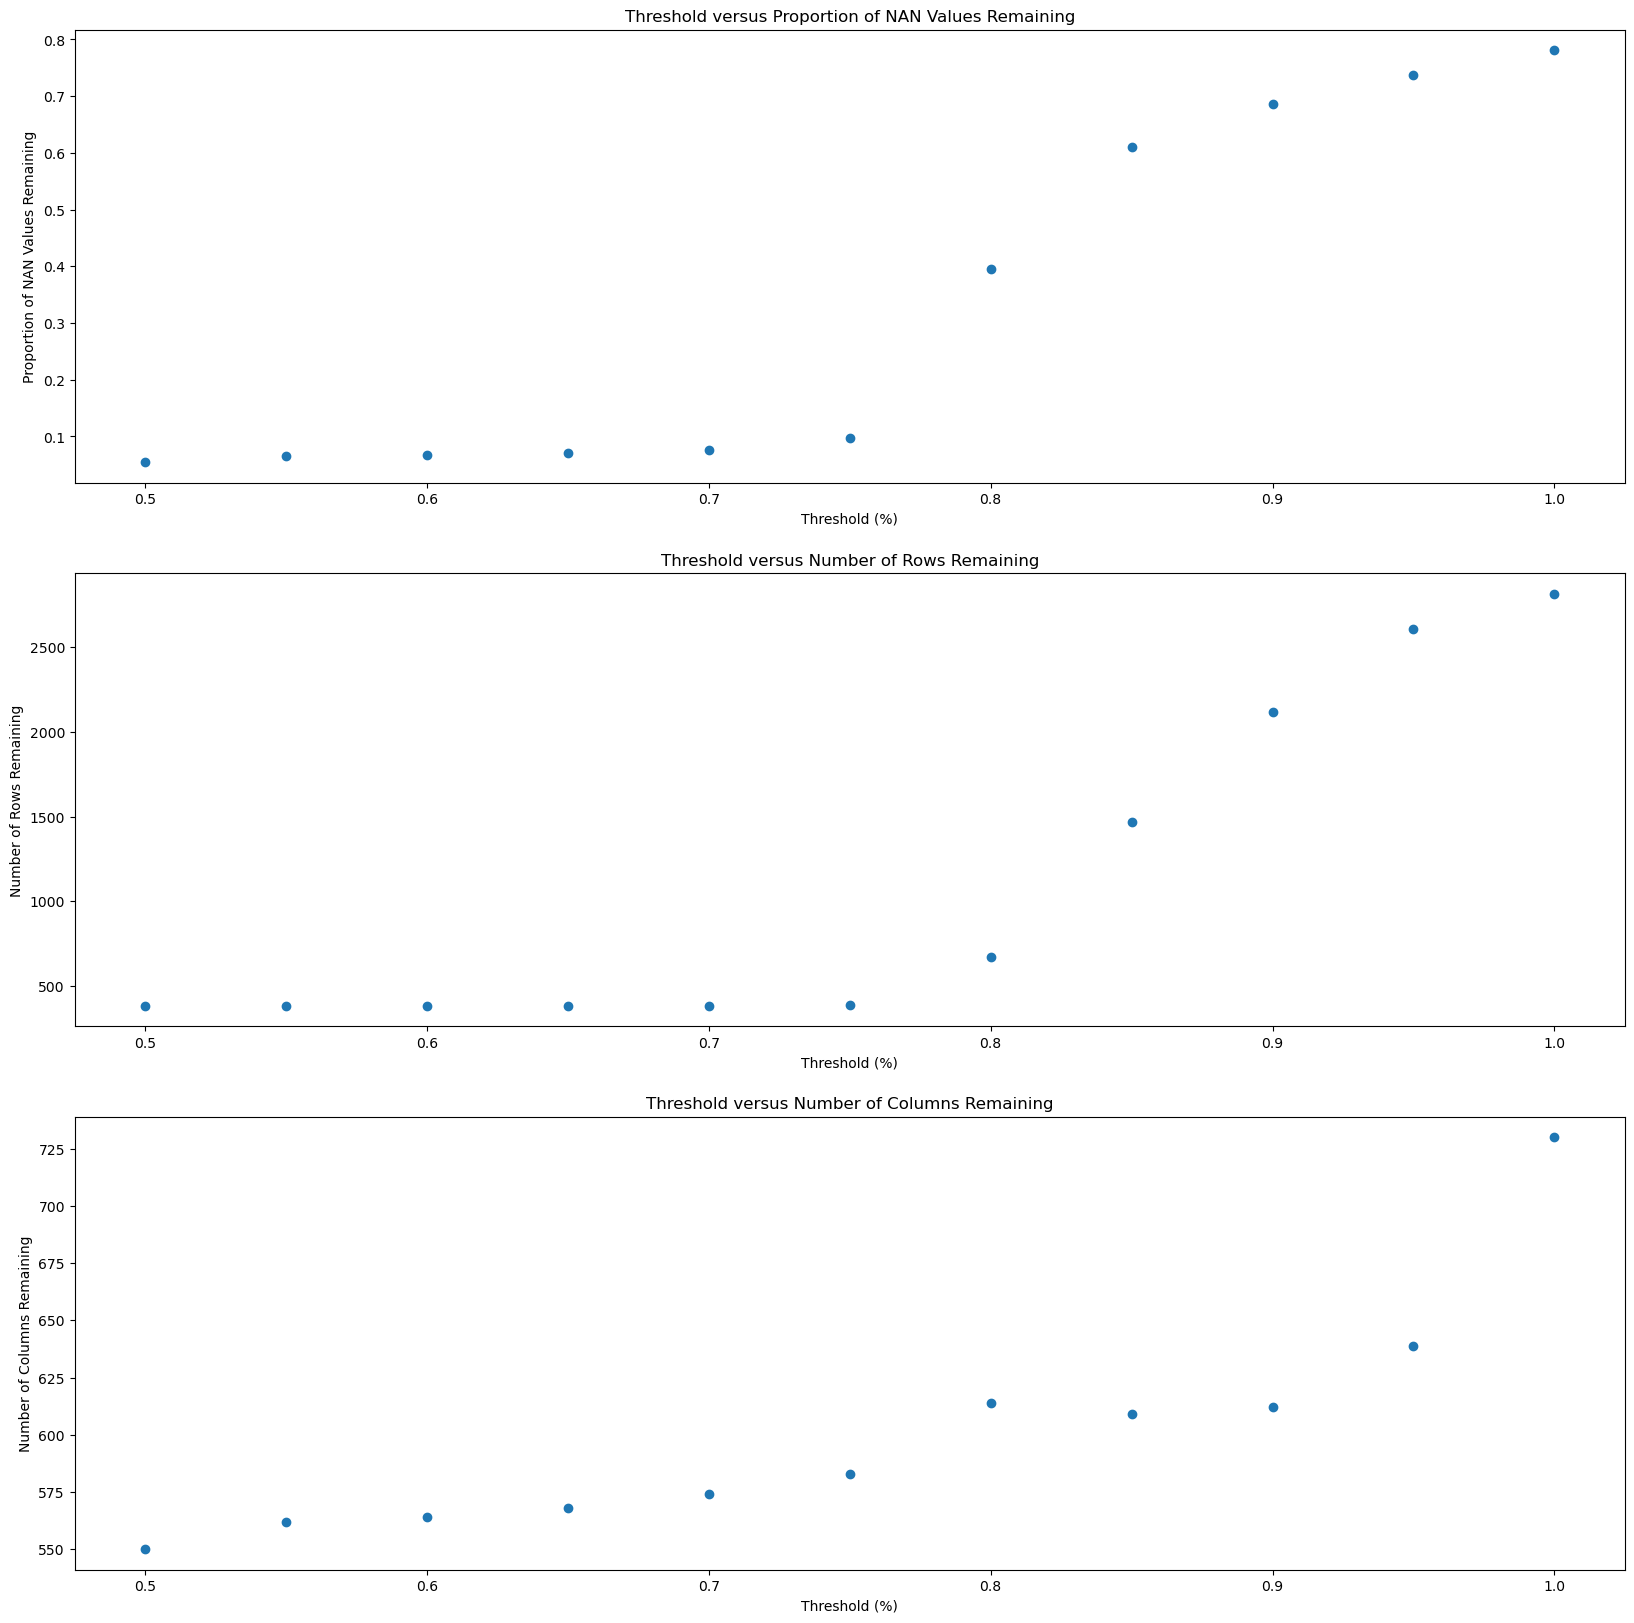

In [66]:
_, axes = plt.subplots(3, 1, figsize=(20, 20))

axes[0].scatter(testing_thresholds, proportion_remaining)
axes[0].set_title('Threshold versus Proportion of NAN Values Remaining')
axes[0].set_xlabel('Threshold (%)')
axes[0].set_ylabel('Proportion of NAN Values Remaining')

axes[1].scatter(testing_thresholds, rows_remaining)
axes[1].set_title('Threshold versus Number of Rows Remaining')
axes[1].set_xlabel('Threshold (%)')
axes[1].set_ylabel('Number of Rows Remaining')

axes[2].scatter(testing_thresholds, columns_remaining)
axes[2].set_title('Threshold versus Number of Columns Remaining')
axes[2].set_xlabel('Threshold (%)')
axes[2].set_ylabel('Number of Columns Remaining')

## Train/Test Split by Country

### Test/train split

In [7]:
import random
# Set a seed for reproducibility
random.seed(42)

In [8]:
income_levels = ['linc', 'lm', 'um', 'hinc']

In [9]:
def split_by_inc(df):

    df['date'] = df['date'].astype(str)

    tv = []
    test = []

    for idx, inc in enumerate(income_levels):

        level = idx + 1 #increment by 1 because count starts from zero 
        
        #getting all countries with the index level 
        inc_countries = df[df['income_num'] == level]

        #to get de-duplicated list of high income countries and shuffle the countries to prevent any biased ordering (alphabetical)
        countries = inc_countries['setting'].unique()
        random.shuffle(countries)

        #90% of countries to the train/val set, then the next 10% to the test set
        data_cutoff = len(inc_countries) * 0.9

        #to get the number of rows taken up by each country, and then get cumulative counts to get proportion
        country_rownum = inc_countries['setting'].value_counts().loc[countries]

        cumulative_num = country_rownum.cumsum()

        tv_countries = []
        test_countries = []

        for country, cumulative in zip(countries, cumulative_num):
            if cumulative <= data_cutoff:
                tv_countries.append(country)
            else:
                test_countries.append(country)

        tv_df = df[df['setting'].isin(tv_countries)]
        test_df = df[df['setting'].isin(test_countries)]

        tv.append(tv_df)
        test.append(test_df)

    #combining all train/val/test across the income levels 
    tv_combined_inc = pd.concat([tv[0], tv[1], tv[2], tv[3]], ignore_index=True)
    test_combined_inc = pd.concat([test[0], test[1], test[2], test[3]], ignore_index=True)
    
    #shuffling the combined dataframe to remove order 
    tv_shuffled_inc = tv_combined_inc.sample(frac=1, random_state=42).reset_index(drop=True)
    test_shuffled_inc = test_combined_inc.sample(frac=1, random_state=42).reset_index(drop=True)

    return tv_shuffled_inc, test_shuffled_inc

In [10]:
tv_shuffled, test_shuffled = split_by_inc(dropped) 

In [11]:
tv_shuffled, test_shuffled = split_by_inc(dropped) 

### Cross-Validation

In [12]:
tv_shuffled['setting']

0            Hungary
1            Armenia
2            Austria
3         Azerbaijan
4        Netherlands
            ...     
2450          Israel
2451         Moldova
2452    South Africa
2453        Barbados
2454         Grenada
Name: setting, Length: 2455, dtype: object

In [13]:
#generate the k-fold cross-validation sets using scikit learn's GroupKFold method 
    #this method allows us to still separate by groups 

#gets the encoded country for each index 
groups = tv_shuffled['setting']
#shuffle = False to try to get same number of samples in each fold (80:20 split because there are 5 folds)
group_kfold = GroupKFold(n_splits=5, shuffle=False)
group_kfold.get_n_splits()

#split_dict = split_number : [train data, validation data, ratio]
split_dict = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}
for i, (train_index, val_index) in enumerate(group_kfold.split(tv_shuffled, groups=groups)):
    split_dict[i].append(tv_shuffled.iloc[train_index])
    split_dict[i].append(tv_shuffled.iloc[val_index])
    ratio_val = len(val_index)/(len(train_index) + len(val_index))
    split_dict[i].append(ratio_val) 
    print("Fold " + str(i))
    print(ratio_val)
    ratio_train = len(train_index)/(len(train_index) + len(val_index))
    print(ratio_train)

Fold 0
0.2
0.8
Fold 1
0.2
0.8
Fold 2
0.2
0.8
Fold 3
0.2
0.8
Fold 4
0.2
0.8


In [14]:
diff_columns = split_dict[0][0].columns.difference(split_dict[0][1].columns)
print(diff_columns)

Index([], dtype='object')


#### Iterative Thresholding on Folds

I want to iteratively threshold each cross-validation fold so all columns and rows contain at most 85%, 95%, and 100% missing data 

In [74]:
needed_thresholds = [0.85, 0.95, 1]

#fold : train_85, rows_left, col_left, train_95, rows_left, col_left, train_100, rows_left, col_left
folds_thresh = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}

for fold in range(0, 5):
    for thresh in needed_thresholds:
        new_data, new_proportion, new_changes = iterative_thresholding(split_dict[fold][0], thresh)
        folds_thresh[fold].append(new_data)
        folds_thresh[fold].append(new_data.shape[0])
        folds_thresh[fold].append(new_data.shape[1])

### Saving Data

In [75]:
train_filepath = '../split_income_data/train'
val_filepath = '../split_income_data/val'
test_filepath = '../split_income_data/test'

In [79]:
test_shuffled['Maternal mortality ratio (modeled estimate, per 100,000 live births)']

KeyError: 'Maternal mortality ratio (modeled estimate, per 100,000 live births)'

In [76]:
########### test set

test_input = test_shuffled.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
test_labels = test_shuffled[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input).to_csv(test_filepath + '/X_test.csv')
pd.DataFrame(test_labels).to_csv(test_filepath + '/y_test.csv')

In [77]:
########### validation set

for fold in range(0, 5):
    data = split_dict[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
    val_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input).to_csv(val_filepath + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels).to_csv(val_filepath + '/y_val_' + str(fold) + '.csv')

In [83]:
########### train set

threshs = ['85', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh[fold][idx_multiple]
        train_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
        train_input_idx_drop = train_input.drop(columns=['index'], axis=1)
        train_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop).to_csv(train_filepath + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels).to_csv(train_filepath + '/y_train_' + str(fold) + '_' + thresh + '.csv')

## Train/Test Split by Year

In [9]:
import random
# Set a seed for reproducibility
random.seed(42)

In [10]:
(2018-1985) * 0.9

29.7

In [11]:
#2020, 2019, 2018, 2017, 2016, 2015
(5) / (2018-1985)

0.15151515151515152

In [12]:
1985+30

2015

In [13]:
# put all data from 2015-2020 into the test set, and all data from 1985-2015 in the training/validation set 
dropped['date'] = dropped['date'].astype(str)

tv = dropped[dropped['date'] < '2015']
test = dropped[dropped['date'] >= '2015']

#shuffling the combined dataframe to remove order 
tv_shuffled_year = tv.sample(frac=1, random_state=42).reset_index(drop=True)
test_shuffled_year = test.sample(frac=1, random_state=42).reset_index(drop=True)

#generate the k-fold cross-validation sets using scikit learn's GroupKFold method 
    #this method allows us to still separate by groups 

#gets the encoded country for each index 
groups_year = tv_shuffled_year['date']
#shuffle = False to try to get same number of samples in each fold (80:20 split because there are 5 folds)
group_kfold_year = GroupKFold(n_splits=5, shuffle=False)
group_kfold_year.get_n_splits()

#split_dict = split_number : [train data, validation data, ratio]
split_dict_year = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}
for i, (train_index, val_index) in enumerate(group_kfold_year.split(tv_shuffled_year, groups=groups_year)):
    split_dict_year[i].append(tv_shuffled_year.iloc[train_index])
    split_dict_year[i].append(tv_shuffled_year.iloc[val_index])
    ratio_val_year = len(val_index)/(len(train_index) + len(val_index))
    split_dict_year[i].append(ratio_val_year) 
    print("Fold " + str(i))
    print(ratio_val_year)
    ratio_train_year = len(train_index)/(len(train_index) + len(val_index))
    print(ratio_train_year)

Fold 0
0.20015308075009566
0.7998469192499044
Fold 1
0.1997703788748565
0.8002296211251435
Fold 2
0.1997703788748565
0.8002296211251435
Fold 3
0.1997703788748565
0.8002296211251435
Fold 4
0.20053578262533486
0.7994642173746651


In [23]:
split_dict_year[0][0]['date'].unique()

array(['1994.0', '1985.0', '1995.0', '1992.0', '1993.0', '2014.0',
       '2013.0', '1996.0', '2000.0', '2012.0', '1987.0', '2001.0',
       '2008.0', '2006.0', '2010.0', '2003.0', '1998.0', '2007.0',
       '1989.0', '2005.0', '1988.0', '1997.0', '1990.0', '2009.0'],
      dtype=object)

In [24]:
split_dict_year[0][1]['date'].unique()

array(['2004.0', '2011.0', '2002.0', '1999.0', '1991.0', '1986.0'],
      dtype=object)

In [18]:
#missing data thresholds

needed_thresholds_year = [0.85, 0.95, 1]

#fold : train_85, rows_left, col_left, train_95, rows_left, col_left, train_100, rows_left, col_left
folds_thresh_year = {0 : [], 1 : [], 2 : [], 3 : [], 4 : []}

for fold in range(0, 5):
    for thresh in needed_thresholds_year:
        new_data, new_proportion, new_changes = iterative_thresholding(split_dict_year[fold][0], thresh)
        folds_thresh_year[fold].append(new_data)
        folds_thresh_year[fold].append(new_data.shape[0])
        folds_thresh_year[fold].append(new_data.shape[1]) 

### Saving Data

In [19]:
train_filepath_year = '../split_year_data/train'
val_filepath_year = '../split_year_data/val'
test_filepath_year = '../split_year_data/test'

In [27]:
########### test set

test_input_year = test_shuffled_year.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
test_labels_year = test_shuffled_year[['Maternal mortality ratio (national estimate, per 100,000 live births)']]

pd.DataFrame(test_input_year).to_csv(test_filepath_year + '/X_test.csv')
pd.DataFrame(test_labels_year).to_csv(test_filepath_year + '/y_test.csv')

In [26]:
########### validation set

for fold in range(0, 5):
    data = split_dict_year[fold][1]
    val_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
    val_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
    pd.DataFrame(val_input).to_csv(val_filepath_year + '/X_val_' + str(fold) + '.csv')
    pd.DataFrame(val_labels).to_csv(val_filepath_year + '/y_val_' + str(fold) + '.csv')

In [25]:
########### train set

threshs = ['85', '95', '1']

for fold in range(0, 5):
    for idx, thresh in enumerate(threshs):
        idx_multiple = idx*3
        data = folds_thresh_year[fold][idx_multiple]
        train_input = data.drop(['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
        train_input_idx_drop = train_input.drop(columns=['index'], axis=1)
        train_labels = data[['Maternal mortality ratio (national estimate, per 100,000 live births)']]
        pd.DataFrame(train_input_idx_drop).to_csv(train_filepath_year + '/X_train_' + str(fold) + '_' + thresh + '.csv')
        pd.DataFrame(train_labels).to_csv(train_filepath_year + '/y_train_' + str(fold) + '_' + thresh + '.csv')